In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(1,'C:\Septiembre-Octubre\Model-Optimization')
from aux_fcn import load_ripples,session, session_path


Working with session: 1 Thy7_1
Plotting signals: 
XGBOOST\Compilation
LSTM\Plot_signal


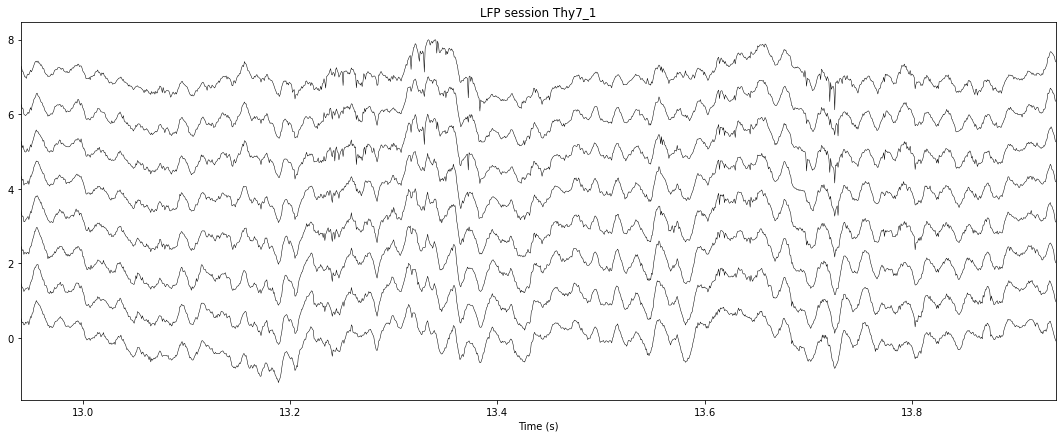

In [2]:
# Choose model output to plot
signal_paths=['XGBOOST\\Compilation','LSTM\\Plot_signal']

##############################################
s=1

# Carga de las sesiones
downsampled_fs=1250

# Choose session
print("\nWorking with session: "+str(s)+" "+session[s])

# Sesión con peores resultados
with open('C:\ProyectoInicial\Datos_pickle\\x_'+session[s]+'.pickle', 'rb') as handle:
    data=pickle.load(handle)
with open('C:\ProyectoInicial\Datos_pickle\\y_'+session[s]+'.pickle', 'rb') as handle:
    y=pickle.load(handle)

ripples=load_ripples(session_path[s])
# Adaptar GT al downsampleo
for ripple in ripples:
    ripple[0]=ripple[0]/24
    ripple[2]=ripple[2]/24
y_pred=[]
print("Plotting signals: ")
for signal_path in signal_paths:
    Root='C:\Septiembre-Octubre\Model-Optimization\\'+signal_path+'\Signal'
    print(signal_path)
    with open(Root+'\\y_pred_'+session[s], 'rb') as handle:
        y_pred.append(pickle.load(handle))

def plot_LFP(k,data,ripples,dur=1):
  data_size = data.shape[0]  #22326272
  data_dur = data_size /downsampled_fs          # 720 segs
  times = np.arange(data_size)      # Vector de tiempos: 0,1 ... 22326271

  if k >= times[-1]:
    print("Data is only %ds long!"%(times[-1]))  # Si se sale del tiempo maximo
    return
  elif k < 0:
    print("Please introduce a valid integer.")
    return

  ini_idx = int(k * downsampled_fs)            # Inicio de la ventana mostrada 
  end_idx = np.minimum(int((k+dur) * downsampled_fs), data_size-1)  #fin  La ventana visualizada tiene en principio 1 seg
  # pos mat: 30 000 (filas) 8 (columnas) de los canales. #Preguntar, no sé exactamente qué operación se hace aquí
  pos_mat = list(range(data.shape[1]-1, -1, -1)) * np.ones((end_idx-ini_idx, data.shape[1])) 
  fig = plt.figure(figsize=(15,6))
  ax = fig.add_subplot(1, 1, 1)
  #ax.set_ylim(-3, 9)
  ax.margins(x=0)
  ax.set_title("LFP "+"session "+session[s])

  plt.tight_layout()
  plt.xlabel("Time (s)")

  # Lines dónde se usa? Entiendo que son los letreros de los ejes
  
  lines = ax.plot((times[ini_idx:end_idx])/downsampled_fs, data[ini_idx:end_idx, :]*1/np.max(data[ini_idx:end_idx, :], axis=0) + pos_mat, color='k', linewidth=0.5)
  
  fills = []

  for ripple in ripples:
      if (ripple[0] >= ini_idx and ripple[2] <= end_idx) or (ripple[2] >= ini_idx and ripple[2] <= end_idx):
          rip_ini = (ripple[0]) / downsampled_fs
          rip_end = (ripple[2]) / downsampled_fs
          fill = ax.fill_between([rip_ini, rip_end], [-3, -3], [9, 9], color="tab:red", alpha=0.3)
          fills.append(fill)
  
  plt.show()

plot_LFP(12.94,data,ripples,dur=1)

In [2]:
def plot_ripples_output(k,data,ripples,signals,dur=1):
  data_size = data.shape[0]  #22326272
  data_dur = data_size /downsampled_fs          # 720 segs
  times = np.arange(data_size)      # Vector de tiempos: 0,1 ... 22326271

  if k >= times[-1]:
    print("Data is only %ds long!"%(times[-1]))  # Si se sale del tiempo maximo
    return
  elif k < 0:
    print("Please introduce a valid integer.")
    return

  ini_idx = int(k * downsampled_fs)            # Inicio de la ventana mostrada 
  end_idx = np.minimum(int((k+dur) * downsampled_fs), data_size-1)  #fin  La ventana visualizada tiene en principio 1 seg
  # pos mat: 30 000 (filas) 8 (columnas) de los canales. #Preguntar, no sé exactamente qué operación se hace aquí
  pos_mat = list(range(data.shape[1]-1, -1, -1)) * np.ones((end_idx-ini_idx, data.shape[1])) 
  fig = plt.figure(figsize=(15,6))
  ax = fig.add_subplot(2, 1, 1)
  ax.set_ylim(-3, 9)
  ax.margins(x=0)
  plt.tight_layout()
  plt.xlabel("Time (s)")

  # Lines dónde se usa? Entiendo que son los letreros de los ejes
  lines = ax.plot((times[ini_idx:end_idx])/downsampled_fs, data[ini_idx:end_idx, :]*1/np.max(data[ini_idx:end_idx, :], axis=0) + pos_mat, color='k', linewidth=0.5)

  fills = []

  for ripple in ripples:
      if (ripple[0] >= ini_idx and ripple[2] <= end_idx) or (ripple[2] >= ini_idx and ripple[2] <= end_idx):
          rip_ini = (ripple[0]) / downsampled_fs
          rip_end = (ripple[2]) / downsampled_fs
          fill = ax.fill_between([rip_ini, rip_end], [-3, -3], [9, 9], color="tab:red", alpha=0.3)
          fills.append(fill)

    # Sección de plot de la salida de la CNN2D
  ax = fig.add_subplot(2, 1, 2)
  for signal in signals:
    signal=np.reshape(signal,newshape=(-1))
    ax.margins(x=0)
    plt.tight_layout()
    ax.set_ylim([0,1])
    ax.plot((times[ini_idx:end_idx])/downsampled_fs,signal[ini_idx:end_idx])
  ax.legend(signal_paths)

  plt.show()

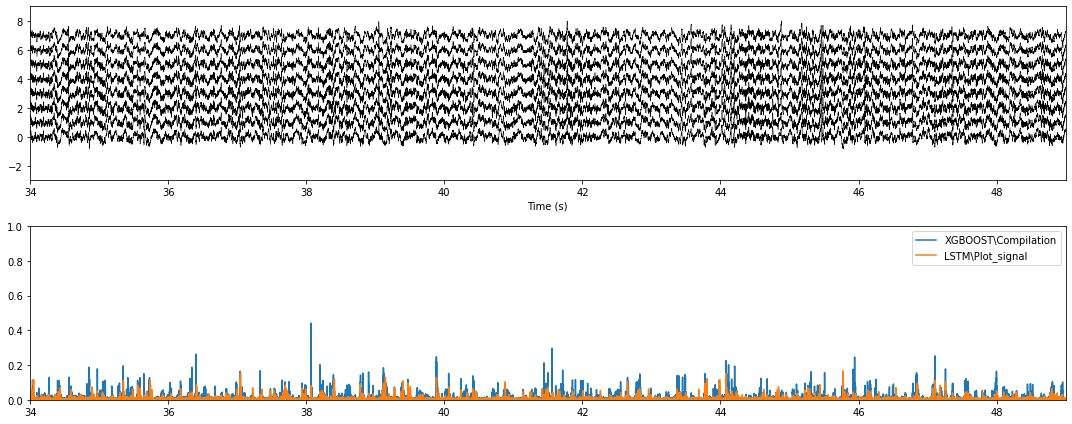

In [16]:
plot_ripples_output(34,data,ripples,y_pred,dur=15)


In [7]:
def plot_LFP(k,data,ripples,dur=1):
  data_size = data.shape[0]  #22326272
  data_dur = data_size /downsampled_fs          # 720 segs
  times = np.arange(data_size)      # Vector de tiempos: 0,1 ... 22326271

  if k >= times[-1]:
    print("Data is only %ds long!"%(times[-1]))  # Si se sale del tiempo maximo
    return
  elif k < 0:
    print("Please introduce a valid integer.")
    return

  ini_idx = int(k * downsampled_fs)            # Inicio de la ventana mostrada 
  end_idx = np.minimum(int((k+dur) * downsampled_fs), data_size-1)  #fin  La ventana visualizada tiene en principio 1 seg
  # pos mat: 30 000 (filas) 8 (columnas) de los canales. #Preguntar, no sé exactamente qué operación se hace aquí
  pos_mat = list(range(data.shape[1]-1, -1, -1)) * np.ones((end_idx-ini_idx, data.shape[1])) 
  fig = plt.figure(figsize=(15,6))
  ax = fig.add_subplot(1, 1, 1)
  #ax.set_ylim(-3, 9)
  ax.margins(x=0)
  ax.set_title("LFP "+"session "+session[s])

  plt.tight_layout()
  plt.xlabel("Time (s)")

  # Lines dónde se usa? Entiendo que son los letreros de los ejes
  
  lines = ax.plot((times[ini_idx:end_idx])/downsampled_fs, data[ini_idx:end_idx, :]*1/np.max(data[ini_idx:end_idx, :], axis=0) + pos_mat, color='k', linewidth=0.5)
  
  fills = []

  for ripple in ripples:
      if (ripple[0] >= ini_idx and ripple[2] <= end_idx) or (ripple[2] >= ini_idx and ripple[2] <= end_idx):
          rip_ini = (ripple[0]) / downsampled_fs
          rip_end = (ripple[2]) / downsampled_fs
          fill = ax.fill_between([rip_ini, rip_end], [-3, -3], [9, 9], color="tab:red", alpha=0.3)
          fills.append(fill)
  
  plt.show()

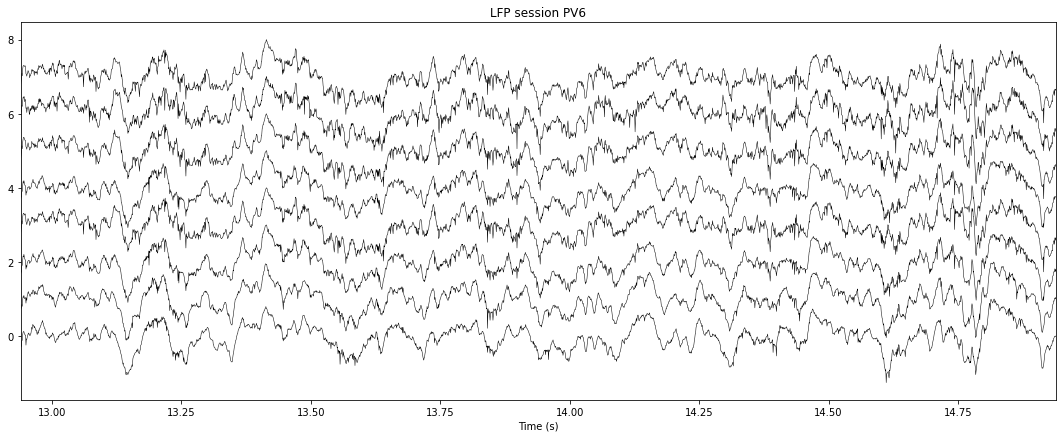

In [8]:
plot_LFP(12.94,data,ripples,dur=2)

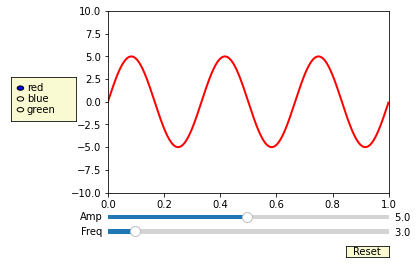